<a href="https://colab.research.google.com/github/itssofiarce/AA1-TUIA-Petetta-Arce/blob/main/practica6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Práctica 6

In [ ]:
""" El dataset student_data.csv contiene información sobre el promedio de horas semanales de estudio que un conjunto
de estudiantes dedicó para la preparación de un examen y la calificación final recibida luego de rendirlo"""


In [23]:
# Importo las librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


import statsmodels.api as sm
import statsmodels.formula.api as smf
# n-1 dummies  si tengo dos valores
# n-2 dummies si tengo tres categorias

In [13]:
# Importo student_data
df = pd.read_csv('/content/drive/MyDrive/Datasets U6-20240614/student_data.csv')
df.head()

,Unnamed: 0,hours_studied,exam_scores
0,1,9.3,63.1
1,2,23.9,90.4
2,3,12.9,63.2
3,4,26.6,87.8
4,5,28.3,92.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     245 non-null    int64  
 1   hours_studied  245 non-null    float64
 2   exam_scores    245 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 5.9 KB


In [14]:
df.isnull().sum()

Unnamed: 0       0
hours_studied    0
exam_scores      0
dtype: int64

Realice un gráfico que le permita visualizar la relación existente entre las
calificaciones finales y las horas de estudio del grupo de estudiantes.
¿Cómo describiría dicha relación a partir de lo observado?
¿Qué métrica utilizaría para cuantificar el grado de asociación lineal entre
ambas variables? Calcúlela e interprete el valor obtenido.

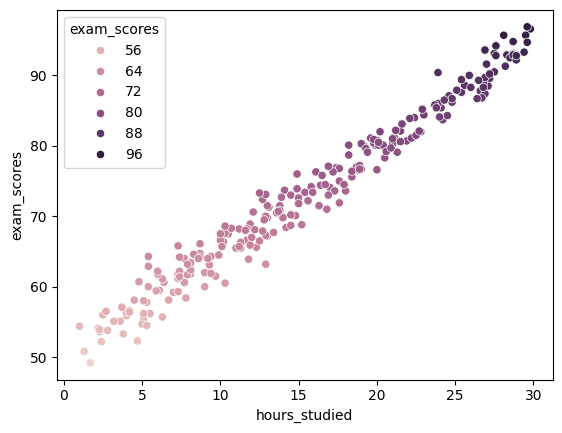

In [20]:
# Relacion a partir de lo observado
sns.scatterplot(x = 'hours_studied', y = 'exam_scores', hue='exam_scores', data = df);

La interpretación del gráfico es que a mayor cantidad de horas de estudio, mayor es la nota del alumno. Como metétrica usaría el coeficiente de correlación de pearson para determinar si hay una correlación lineal

In [22]:
# Convert dataframe into series
list1 = df['hours_studied']
list2 = df['exam_scores']

# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.986


Como el valor del coeficiente es es cercano a uno, entonces hay una alta probabliliad de que ambas varibles se relacionen linealmente

A partir de los datos, ajuste un modelo de regresión lineal para la
calificación final del examen en función de las horas semanales de estudio.
Represente gráficamente el modelo ajustado en el gráfico realizado en el
ítem 1

In [25]:
mod = smf.ols(formula='exam_scores ~ hours_studied', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            exam_scores   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     8555.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):          2.11e-191
Time:                        20:47:53   Log-Likelihood:                -512.26
No. Observations:                 245   AIC:                             1029.
Df Residuals:                     243   BIC:                             1036.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        50.2541      0.278    180.576

In [31]:
# Convert the Series to a DataFrame
hours_studied_df = df[['hours_studied']]


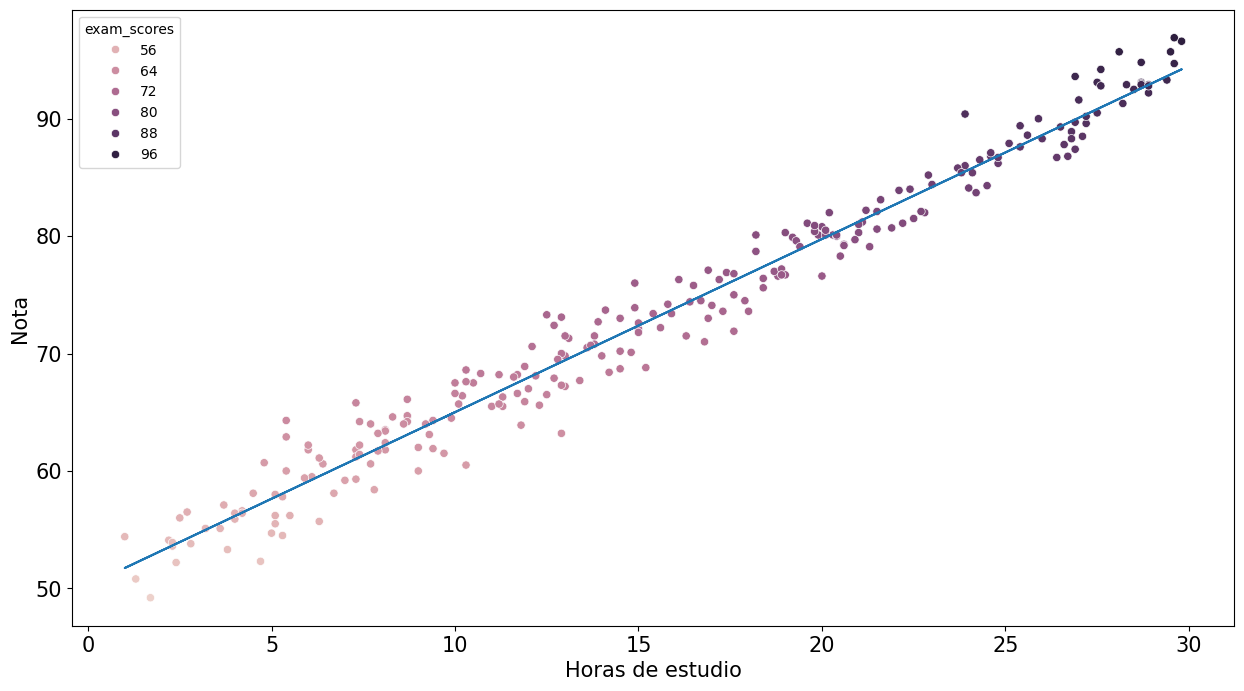

In [30]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = 'hours_studied', y = 'exam_scores', hue='exam_scores', data = df);
plt.plot(hours_studied_df, res.predict(hours_studied_df))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Horas de estudio',fontsize = 15)
plt.ylabel('Nota',fontsize = 15);

Escriba el modelo ajustado en forma desarrollada e interprete cada uno de
los coeficientes que lo componen


# Ejercicio 3


Realice un gráfico que le permita visualizar la relación que existe entre la
longitud del pico y la longitud de la aleta de los pingüinos Palmer, según la
especie. ¿Qué observa?

In [33]:
# Importo el dataset de pinguinos
df3 = pd.read_csv('/content/drive/MyDrive/Datasets U6-20240614/penguins.csv')
df3.head()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [38]:
df3.isnull().sum()

id                   0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [37]:
# Dropeamos los que sean nulos en sexo
df3 = df3.dropna(subset=['sex'])

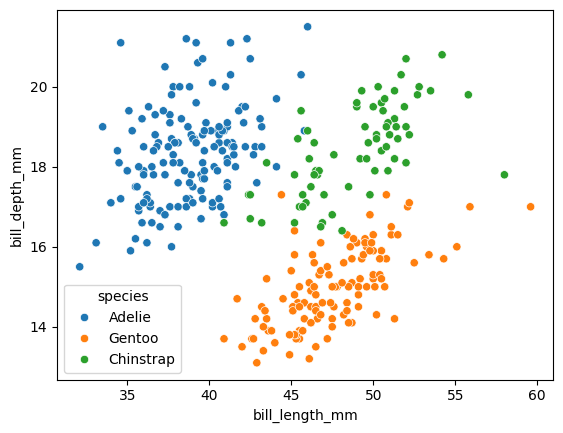

In [40]:
# Scatterplot para analizar la relacion entre longitud del pico y la longitud de la aleta
sns.scatterplot(x = 'bill_length_mm', y = 'bill_depth_mm', hue='species', data = df3);

por el gráfico de arriba se observa que, dependiendo de la especie influye el valor de la longitud y parecería no haber linealidad entre los datos al estudiar el tamaño de todas las especies al mismo tiempo

In [43]:
# Variable independiente  ~ variables explicaivas
modelo =smf.ols(formula='body_mass_g ~ flipper_length_mm', data=df3)
res = modelo.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Fri, 14 Jun 2024   Prob (F-statistic):          3.13e-105
Time:                        21:07:02   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5872.0927    310.28

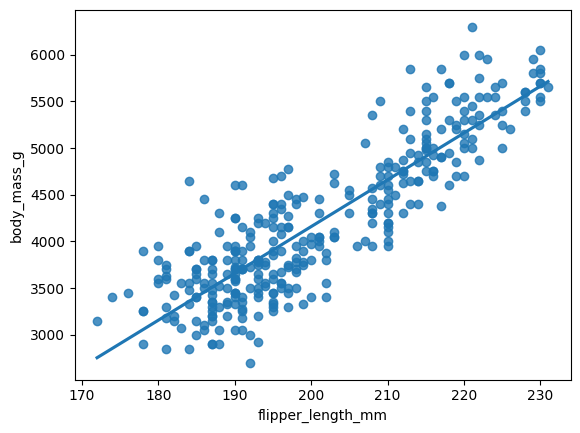

In [44]:
sns.regplot(x = 'flipper_length_mm', y = 'body_mass_g', data = df3, ci = False);

Variable explicativa: flipper_length_mm \n

Variable independiente: body_mass_g

A partir de las observaciones que realizó en el ítem 1, introduzca alguna
modificación sobre el modelo inicial que le permita mejorar su capacidad
predictiva para la longitud del pico de los pingüinos.
Ajuste el nuevo modelo propuesto (modelo 2). PUEDO MIRAR EL MSE

## Analisis de residuos el (ERROR)

Dif entre valor obsvardo y el valor real


- Errores no Correlacionads: Evitar patrones que sean reconocibles --> Durbin-Watson [0-4]
    - Cerca de 2: Indica que no hay autocorrelación
    - 0 : Correlacion positiva
    - 4 : Correlación negativa
    - 2 : No hay autocorrelación
- Distribucion normal de los errores (test de normalidad) --> qqplot
    - Jarque-Bera con alpha < 0.05 --> rechaza no hay normalidad
    - Omnibus (se fija en los picos de la curva)
- Variancia constante de los errores: Si los errores estan cerca del 0. Estan alejados igualmente de la media, hay patrón entonces NO hay indicios de normalidad. No estas explicando lo que pasa en el modelo
- Linealidad de los regresores: Se grafica para cada una de las variables la regresión teniendo en cuenta todas las demas variables en ejecución. El comportamiento de las varibles se ajusta a un modelo lineal.  


El estadístico F con la probabilidad asociada. La combinacion sin el error logra explicar la varibale predecha.

IMportancia del Rcuadrado:
Error cuadrático medio (la distancia de los valores reales a la recta)
- Cerca de 1: Se ajusta perfectamente mis datos, porque las distancias son cero) --> R^2 = 1 - SUma de las distancias
- Cerca de 0: Hay cierto error, no se ajustan perfectamente.

AIC y BIC comparativas a menor valor mejor es

Estadístico T: que tan significativo es cuantos desvíos estandar te vas para estandatizar????

Parte practica con datos ya limpios y analísis de los resultados

Parte de escritura: estadistica descriptivas básicas, si hay sesgo U3, media mediana cuartil y entender la salida de las tablitas. Toda la cuestiond e regresión lineal simple y múltiple. Entender el tema de las dummies e interpretacion de salida de modelo coeficiente de pearson, preguntas preactivas.